In [1]:
import sys
from pathlib import Path
import importlib

project_root = Path("..")  # .. vì notebook nằm trong /notebooks
sys.path.append(str(project_root / "src"))

import binned_scores
import visualize_diem_thi

# reload đề phòng notebook đang cache version cũ
importlib.reload(binned_scores)
importlib.reload(visualize_diem_thi)

from binned_scores import export_binned_csv
from visualize_diem_thi import (
    load_binned_scores,
    plot_subject_from_binned,
    plot_all_subjects_from_binned,
)


In [2]:
# Tạo CSV + DataFrame binned (nếu chưa có)
binned = export_binned_csv(
    data_dir=project_root / "data",  # chỗ có diem_thi_toan_quoc_*.csv
    years=range(2019, 2025),
    out_path=project_root / "data/diem_thi_binned_2019_2024.csv",
)


Đang đọc: ../data/diem_thi_toan_quoc_2019.csv
Đang đọc: ../data/diem_thi_toan_quoc_2020.csv
Đang đọc: ../data/diem_thi_toan_quoc_2021.csv
Đang đọc: ../data/diem_thi_toan_quoc_2022.csv
Đang đọc: ../data/diem_thi_toan_quoc_2023.csv
Đang đọc: ../data/diem_thi_toan_quoc_2024.csv
Tính bin cho môn: Toán
Tính bin cho môn: Văn
Tính bin cho môn: Ngoại ngữ
Tính bin cho môn: Lí
Tính bin cho môn: Hóa
Tính bin cho môn: Sinh
Tính bin cho môn: Sử
Tính bin cho môn: Địa
Tính bin cho môn: GDCD
✅ Đã lưu bảng bin vào: ../data/diem_thi_binned_2019_2024.csv
Số dòng: 2264


### Nếu đã có data thì chạy cái này là đủ

In [5]:
binned = load_binned_scores(project_root / "data/diem_thi_binned_2019_2024.csv")


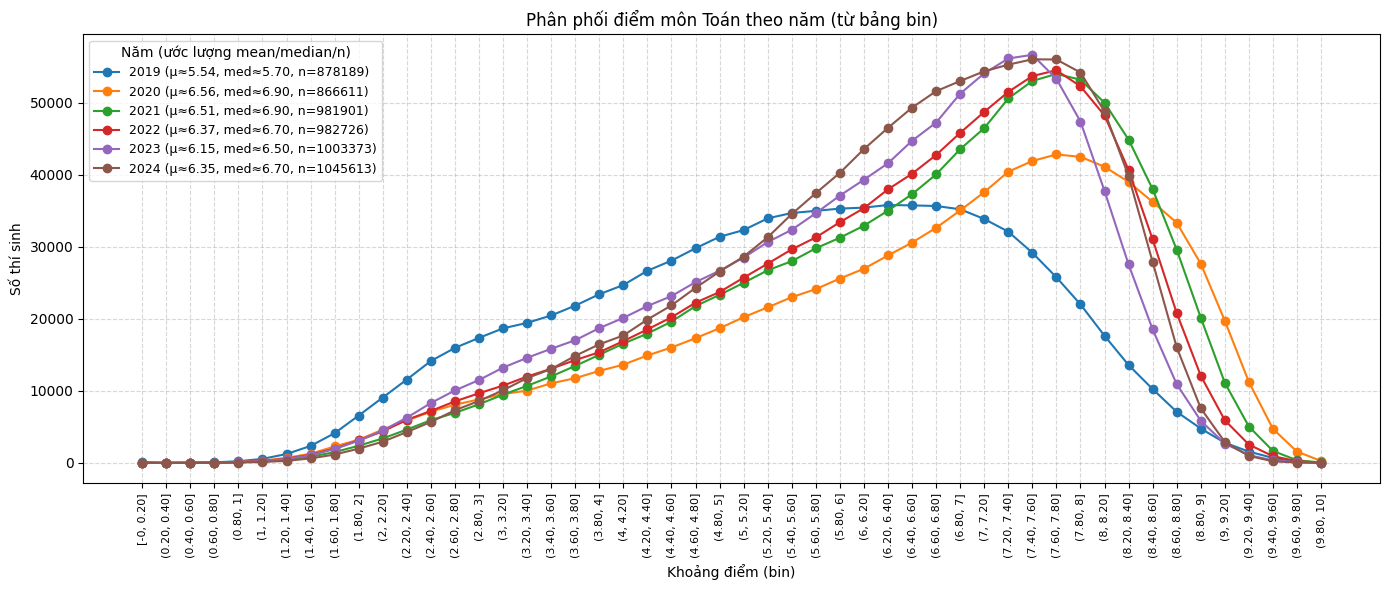

In [3]:
plot_subject_from_binned(binned, "Toán")


Vẽ môn: Toán


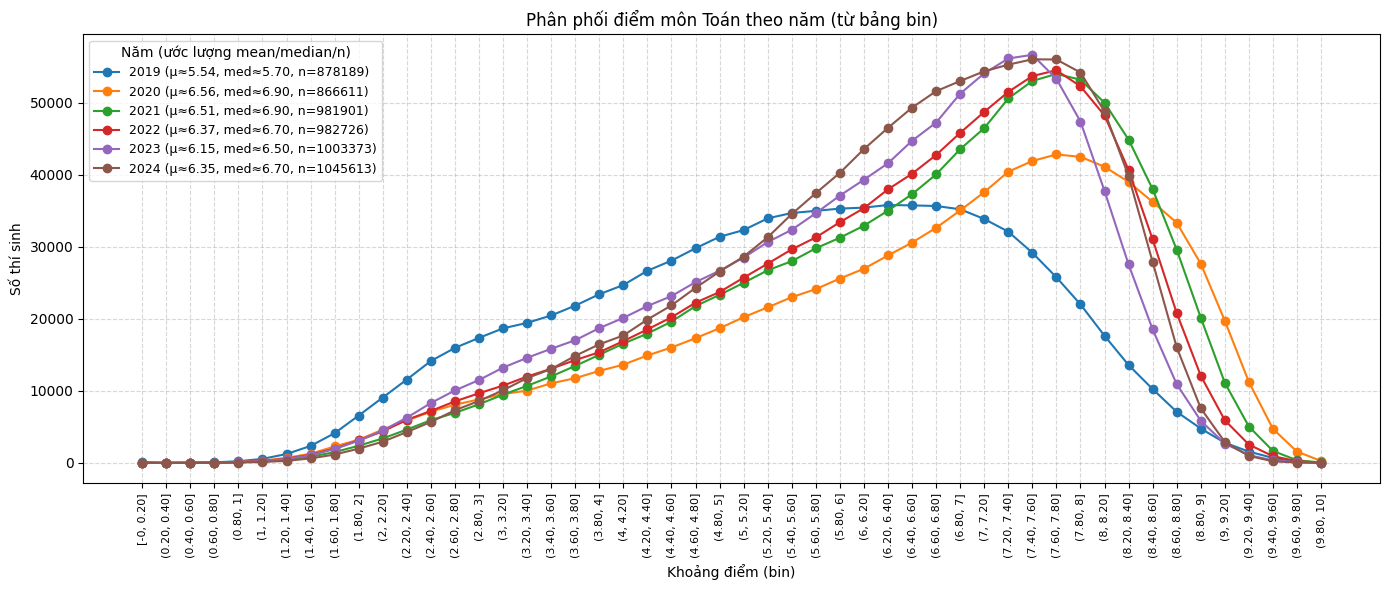

Vẽ môn: Văn


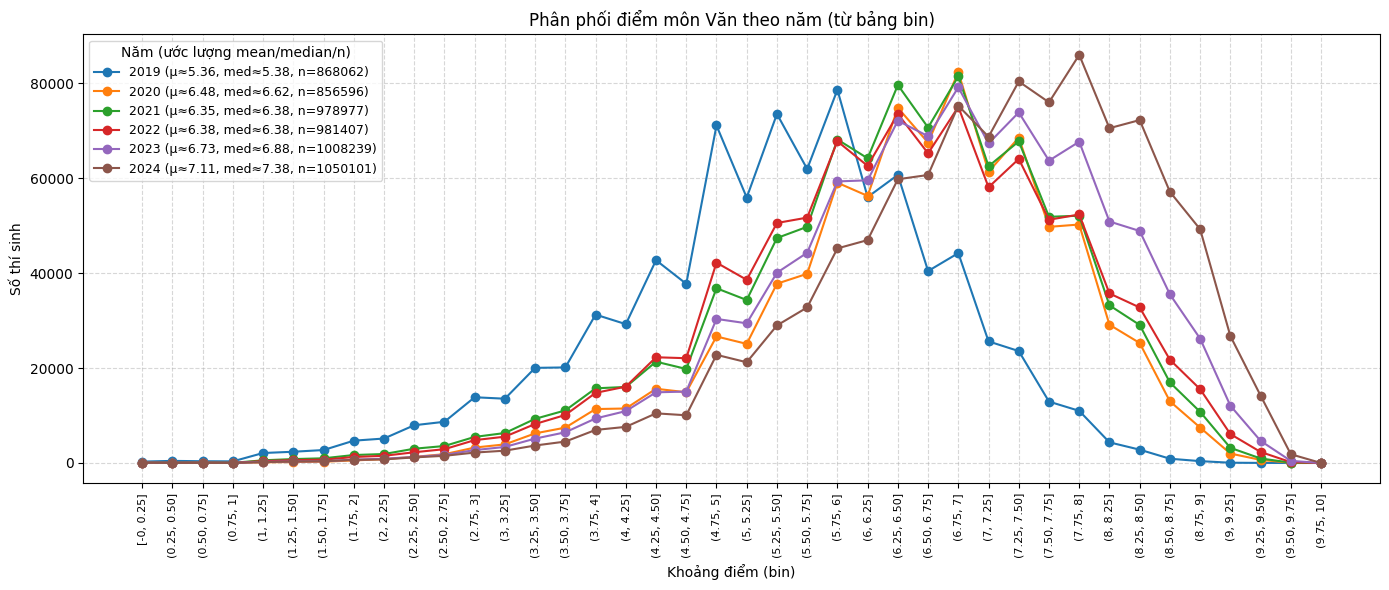

Vẽ môn: Ngoại ngữ


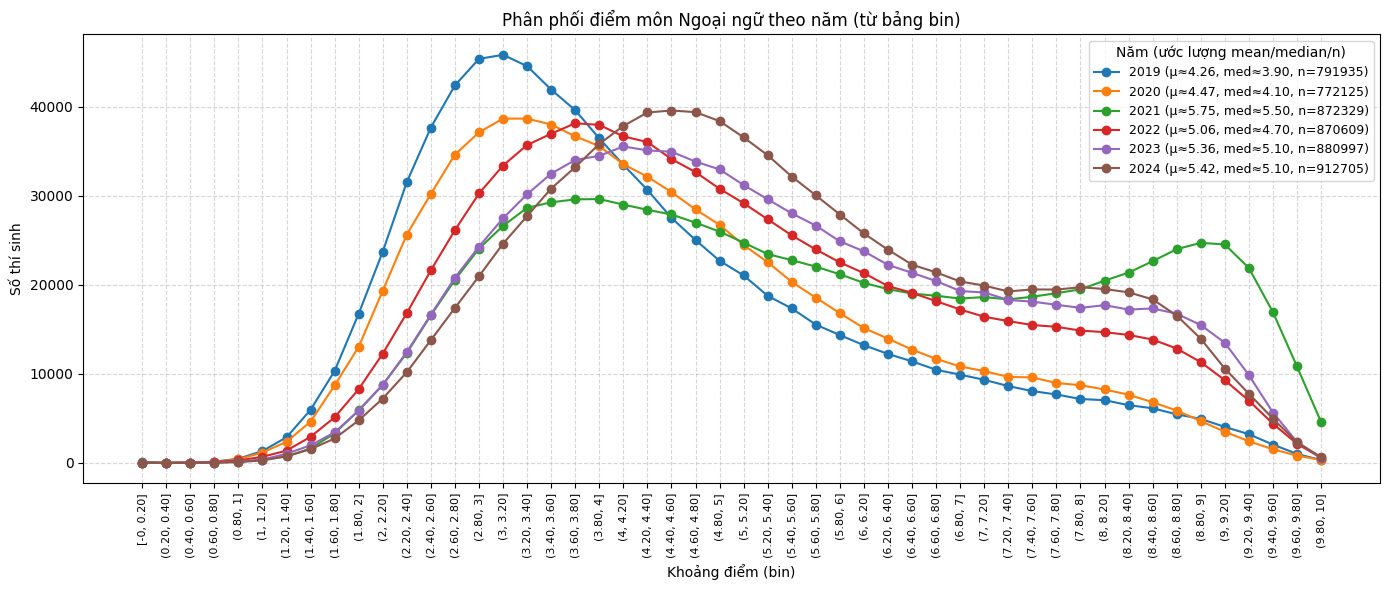

Vẽ môn: Lí


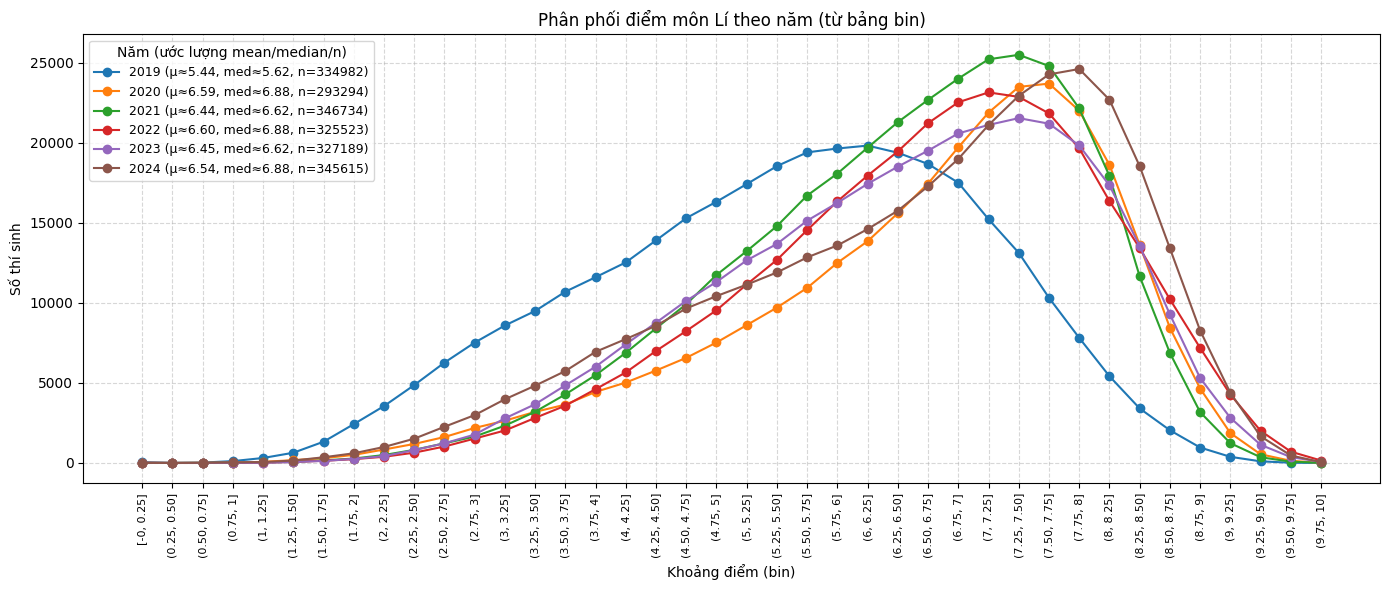

Vẽ môn: Hóa


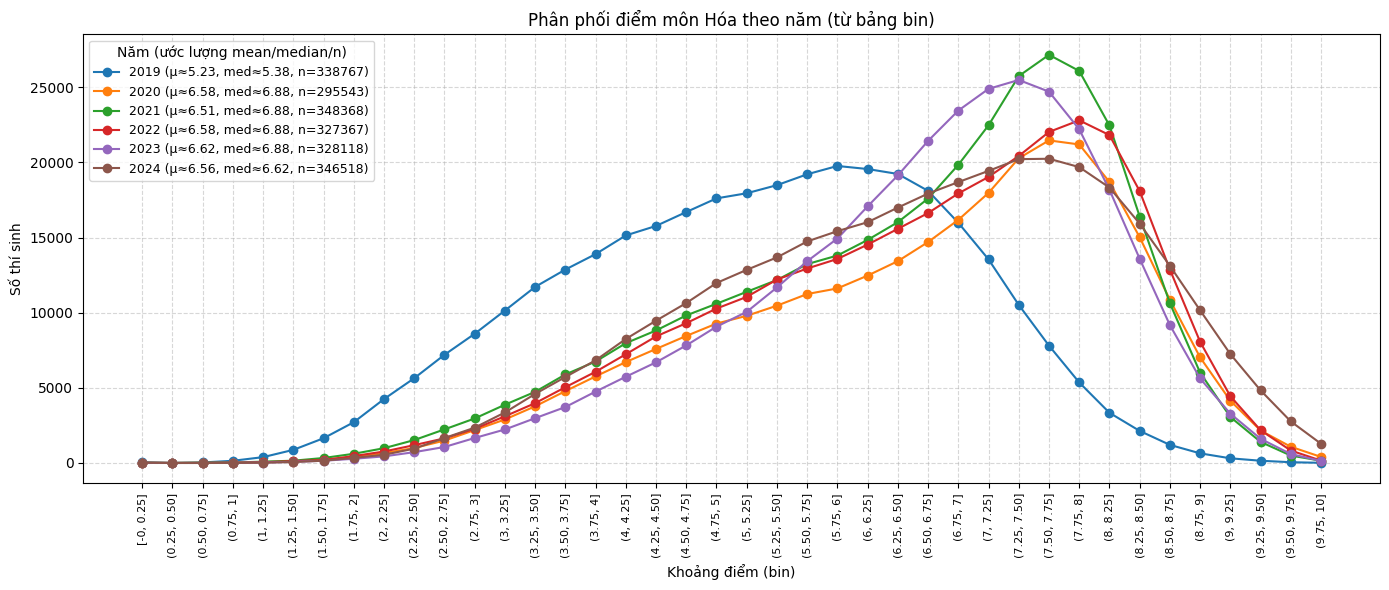

Vẽ môn: Sinh


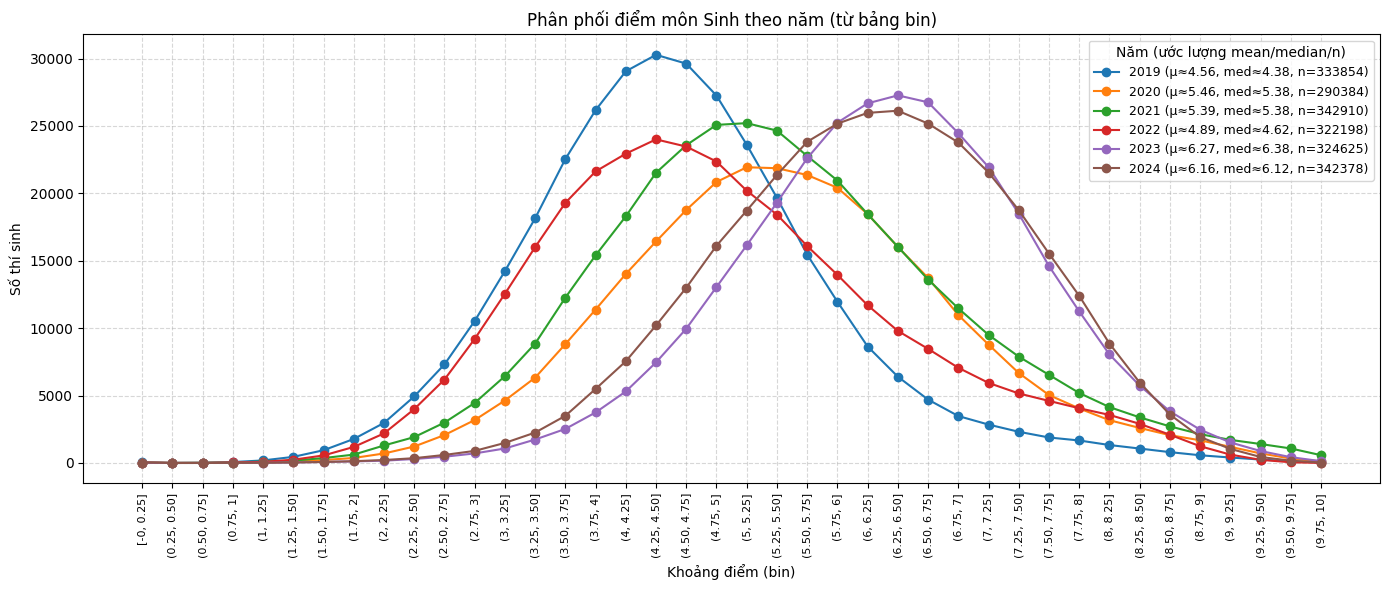

Vẽ môn: Sử


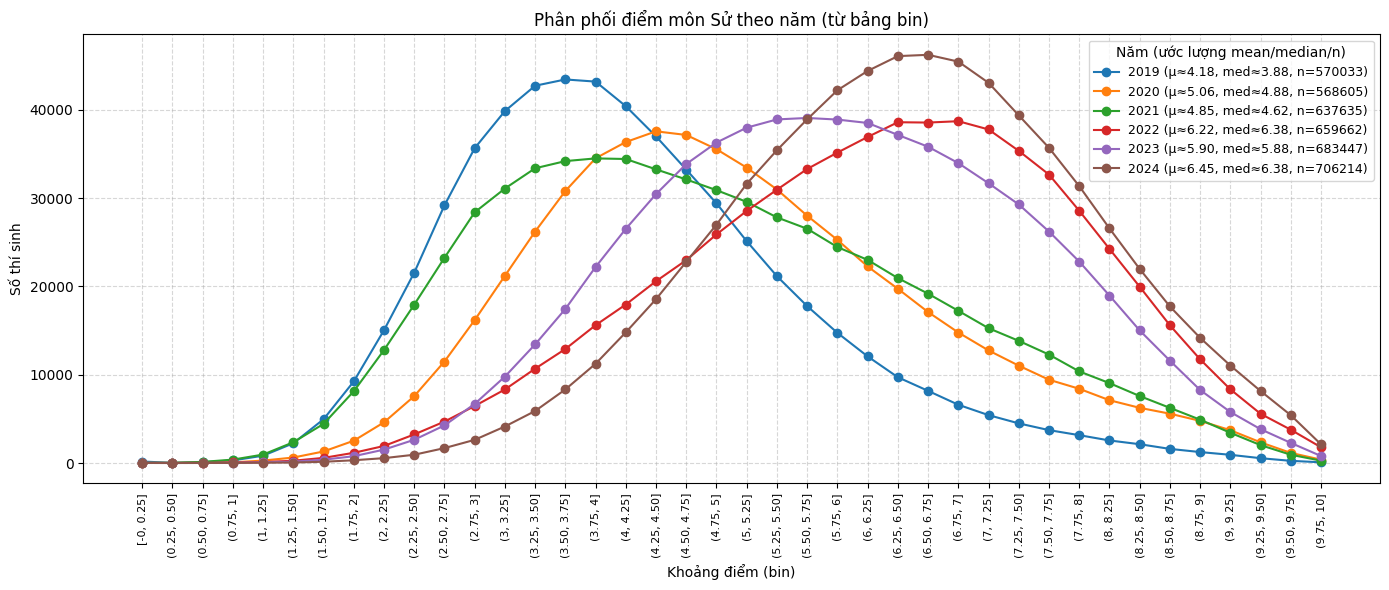

Vẽ môn: Địa


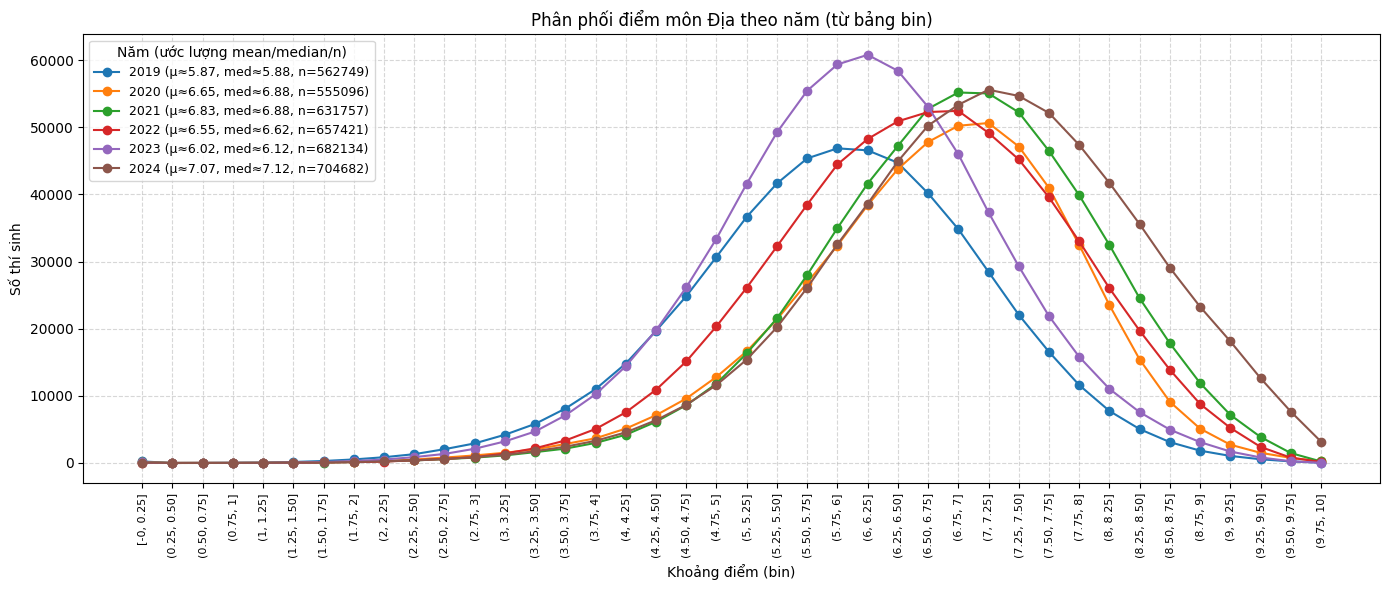

Vẽ môn: GDCD


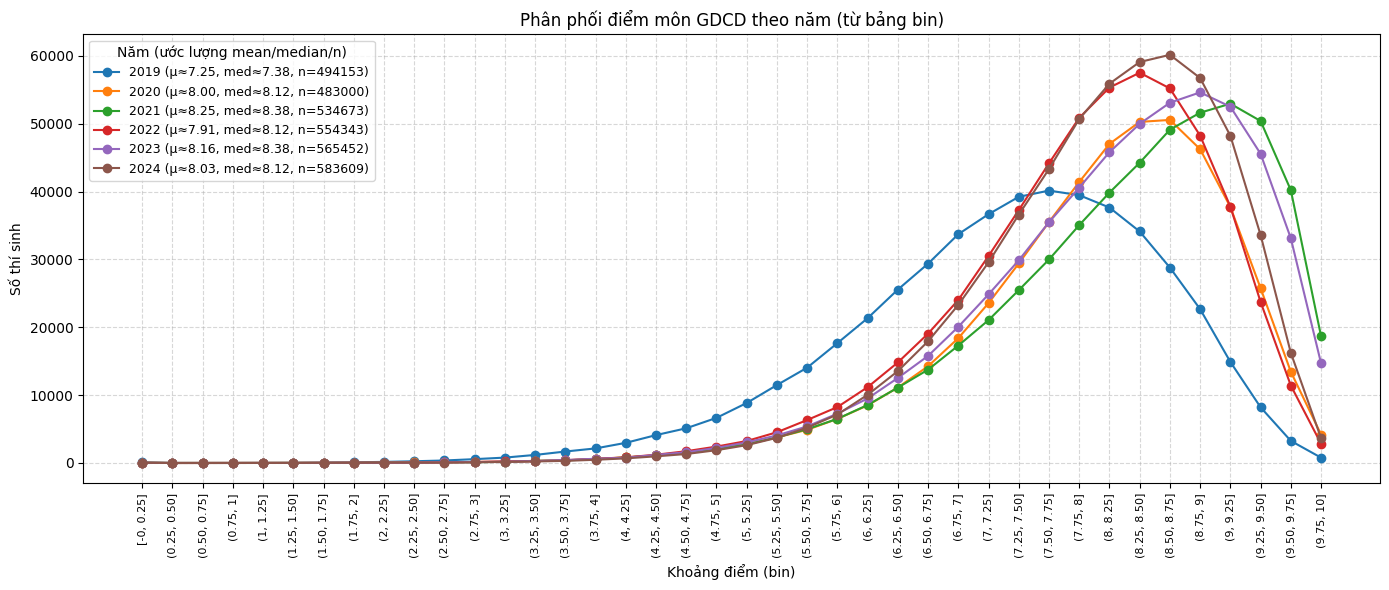

In [4]:
plot_all_subjects_from_binned(binned)
